In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt 

in_data = loadmat('BreastCancer.mat')
y_labels = in_data['y'] 
X_data = in_data["X"]

In [2]:
def ista_solve_hot( A, d, la_array ):
    # ista_solve_hot: Iterative soft-thresholding for multiple values of
    # lambda with hot start for each case - the converged value for the previous
    # value of lambda is used as an initial condition for the current lambda.
    # this function solves the minimization problem
    # Minimize |Ax-d|_2^2 + lambda*|x|_1 (Lasso regression)
    # using iterative soft-thresholding.
    max_iter = 10**4
    tol = 10**(-3)
    tau = 1/np.linalg.norm(A,2)**2
    n = A.shape[1]
    w = np.zeros((n,1))
    num_lam = len(la_array)
    X = np.zeros((n, num_lam))
    for i, each_lambda in enumerate(la_array):
        for j in range(max_iter):
            z = w - tau*(A.T@(A@w-d))
            w_old = w
            w = np.sign(z) * np.clip(np.abs(z)-tau*each_lambda/2, 0, np.inf)
            X[:, i:i+1] = w
            if np.linalg.norm(w - w_old) < tol:
                break
    return X



## Question 1a)




on training we have a good trade off between errors in the residual error and norm_1 error, it's more of a trade off as we can see directly which lambda is the median between the two errors

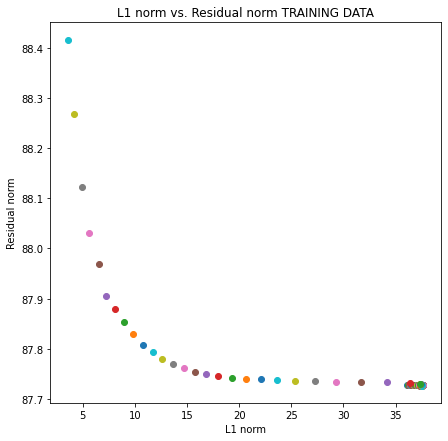

In [3]:
A = X_data[:100,]
d = y_labels[:100,]
lamdas = np.logspace(-6, 1, num=100, base=10)

w_array = ista_solve_hot(A,d,lamdas) # this is the omega for different values of lamda

fig, ax = plt.subplots(figsize=(7, 7))

for i in range(100):
    residual = np.linalg.norm(A@w_array[:,i]- d,ord=2) #let zero = i for 0...50
    norm_1 = np.linalg.norm(w_array[:,i],ord=1) #let zero = i for 0...50

    ax.plot(norm_1, residual, 'o')

# Add axis labels and title
ax.set_xlabel('L1 norm')
ax.set_ylabel('Residual norm')
ax.set_title('L1 norm vs. Residual norm TRAINING DATA')

# Display the plot
plt.show()

## Question 1b)

as the number of columns used increases, it quickely evens out as to how many variables are actually needed to make a difference in the data calculations

In [4]:
# (d.reshape(-1)).shape

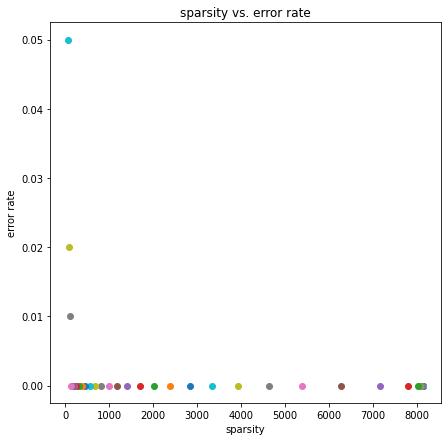

In [5]:
fig, ax = plt.subplots(figsize=(7, 7))

A = X_data[:100,]
d = y_labels[:100,]
lamdas = np.logspace(-6, 1, num=100, base=10)


w_array = ista_solve_hot(A,d,lamdas) # this is the omega for different values of lamda
  
for i in range(100):
    y_predict = np.sign(A@w_array[:,i])
    erate = np.mean(d.reshape(-1) != y_predict)
    #print(erate)
    sparsity = 0
    for j in range(8141):
        if np.abs(w_array[j][i]) > 10**-6:
            sparsity += 1


    ax.plot(sparsity, erate, 'o')

# Add axis labels and title
ax.set_xlabel('sparsity')
ax.set_ylabel('error rate')
ax.set_title('sparsity vs. error rate')

# Display the plot
plt.show()


## Question 1.1c)

here we see an example of over fitting on the test set, we start to acumalte large amounts of error because we modeled too closely the training data

(194, 8141)


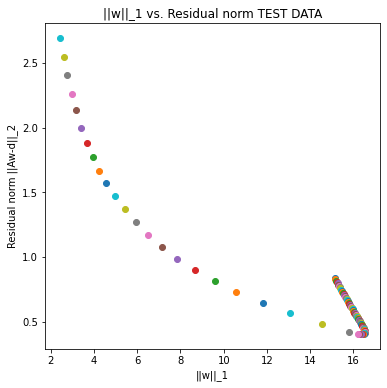

In [6]:
A_test = X_data[101:,]

print(A_test.shape)
d_test = y_labels[101,]
lamdas = np.logspace(-6, 1, num=100, base=10)

w_array_test = ista_solve_hot(A_test,d_test,lamdas) # this is the omega for different values of lamda

fig, ax = plt.subplots(figsize=(6,6))

for i in range(100):
    residual = np.linalg.norm(A_test@w_array_test[:,i]- d_test,ord=2) #let zero = i for 0...50
    norm_1 = np.linalg.norm(w_array_test[:,i],ord=1) #let zero = i for 0...50
    

    ax.plot(norm_1, residual,'o')

# Add axis labels and title
ax.set_xlabel('||w||_1')
ax.set_ylabel('Residual norm ||Aw-d||_2')
ax.set_title('||w||_1 vs. Residual norm TEST DATA')

# Display the plot
plt.show()

## Question 1.2c)
as the number of columns used increases, it quickely evens out as to how many variables are actually needed to make a difference in the data calculations

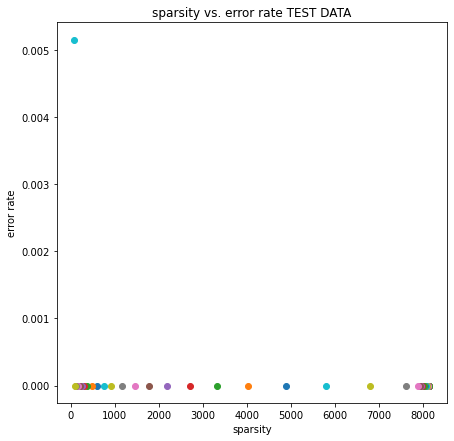

In [7]:
A_test = X_data[101:,]
d_test = y_labels[101,]
lamdas = np.logspace(-6, 1, num=100, base=10)

w_array_test = ista_solve_hot(A_test,d_test,lamdas) # this is the omega for different values of lamda
 
fig, ax = plt.subplots(figsize=(7, 7))


for i in range(100):
    y_predict = np.sign(A_test@w_array_test[:,i])
    erate = np.mean(d_test.reshape(-1) != y_predict)
    #print(erate)
    sparsity = 0
    for j in range(8141):
        if np.abs(w_array_test[j][i]) > 10**-6:
            sparsity += 1


    ax.plot(sparsity, erate, 'o')

# Add axis labels and title
ax.set_xlabel('sparsity')
ax.set_ylabel('error rate')
ax.set_title('sparsity vs. error rate TEST DATA')

# Display the plot
plt.show()


# Question 2

In [8]:
def ista_solve_hot_ridge( A, d, la_array ):
    # ista_solve_hot: Iterative soft-thresholding for multiple values of
    # lambda with hot start for each case - the converged value for the previous
    # value of lambda is used as an initial condition for the current lambda.
    # this function solves the minimization problem
    # Minimize |Ax-d|_2^2 + lambda*|x|_1 (Lasso regression)
    # using iterative soft-thresholding.
    max_iter = 10**4
    tol = 10**(-3)
    tau = 1/np.linalg.norm(A,2)**2
    n = A.shape[1]
    w = np.zeros((n,1))
    num_lam = len(la_array)
    X = np.zeros((n, num_lam))
    for i, each_lambda in enumerate(la_array):
        for j in range(max_iter):
            z = w - tau*(A.T@(A@w-d))
            w_old = w
#             w = np.sign(z) * np.clip(np.abs(z)-tau*each_lambda/2, 0, np.inf)
            w = A.T@np.linalg.inv(A@A.T + la_array[i]*(np.identity(len(A))))@d
            X[:, i:i+1] = w
            if np.linalg.norm(w - w_old) < tol:
                break
    return X

In [9]:
def ista_solve_hot( A, d, la_array ):
    # ista_solve_hot: Iterative soft-thresholding for multiple values of
    # lambda with hot start for each case - the converged value for the previous
    # value of lambda is used as an initial condition for the current lambda.
    # this function solves the minimization problem
    # Minimize |Ax-d|_2^2 + lambda*|x|_1 (Lasso regression)
    # using iterative soft-thresholding.
    max_iter = 10**4
    tol = 10**(-3)
    tau = 1/np.linalg.norm(A,2)**2
    n = A.shape[1]
    w = np.zeros((n,1))
    num_lam = len(la_array)
    X = np.zeros((n, num_lam))
    for i, each_lambda in enumerate(la_array):
        for j in range(max_iter):
            z = w - tau*(A.T@(A@w-d))
            w_old = w
            w = np.sign(z) * np.clip(np.abs(z)-tau*each_lambda/2, 0, np.inf)
            X[:, i:i+1] = w
            if np.linalg.norm(w - w_old) < tol:
                break
    return X

In [10]:
## Breast Cancer LASSO Exploration
## Prepare workspace
from scipy.io import loadmat
import numpy as np
X = loadmat("BreastCancer.mat")['X']
y = loadmat("BreastCancer.mat")['y']

##  10-fold CV 

# each row of setindices denotes the starting an ending index for one
# partition of the data: 5 sets of 30 samples and 5 sets of 29 samples
setindices = [[1,30],[31,60],[61,90],[91,120],[121,150],[151,179],[180,208],[209,237],[238,266],[267,295]]

# each row of holdoutindices denotes the partitions that are held out from
# the training set
holdoutindices = [[1,2],[2,3],[3,4],[4,5],[5,6],[7,8],[9,10],[10,1]]

cases = len(holdoutindices)

# be sure to initiate the quantities you want to measure before looping
# through the various training, validation, and test partitions
#
# 
#
lam_vals = np.logspace(-6, 1, num=200, base=10)

# Loop over various cases
for j in range(cases):
    # row indices of first validation set
    v1_ind = np.arange(setindices[holdoutindices[j][0]-1][0]-1,setindices[holdoutindices[j][0]-1][1])
    
    # row indices of second validation set
    v2_ind = np.arange(setindices[holdoutindices[j][1]-1][0]-1,setindices[holdoutindices[j][1]-1][1])
    
    # row indices of training set
    trn_ind = list(set(range(295))-set(v1_ind)-set(v2_ind))
    
    # define matrix of features and labels corresponding to first
    # validation set
    Av1 = X[v1_ind,:]
    bv1 = y[v1_ind]
    
    # define matrix of features and labels corresponding to second
    # validation set
    Av2 = X[v2_ind,:]
    bv2 = y[v2_ind]
    
    # define matrix of features and labels corresponding to the 
    # training set
    At = X[trn_ind,:]
    bt = y[trn_ind]
    
# Use training data to learn classifier
   
    W_lamdas_lasso = ista_solve_hot(At,bt,lam_vals)
    
    W_lamdas_ridge = ista_solve_hot_ridge(At,bt,lam_vals)

    #print(len(v1_ind), len(v2_ind), len(trn_ind))
#

# Find best lambda value using first validation set
    lasso_error = {}
    for i in range(200):
        y_predict_lasso = np.sign(Av1@W_lamdas_lasso[:,i])
        error_L = np.mean(y != y_predict_lasso)
        lasso_error[error_L]= i
            
    ridge_error = {}
    for i in range(200):
        y_predict_ridge = np.sign(Av1@W_lamdas_ridge[:,i])
        error_r = np.mean(y != y_predict_ridge)
        ridge_error[error_r]= i
        
        
min_lam_ridge = min(ridge_error.values()) 
min_lam_lasso = min(lasso_error.values()) 
        

# print(min(ridge_error, key = ridge_error.get),"best ridge lambda")
y_pred_l = np.sign(Av2@(W_lamdas_lasso[:,min_lam_lasso].reshape((8141, 1))))
y_pred_r = np.sign(Av2@(W_lamdas_ridge[:,min_lam_ridge].reshape((8141, 1))))


missclass_l = 0
missclass_r = 0
errors_l = np.count_nonzero(bv2 - y_pred_l)
errors_r = np.count_nonzero(bv2 - y_pred_r)


print("misclassifications lasso: ", errors_l)
print("misclassifications ridge: ", errors_r)
missclass_l += errors_l
missclass_r += errors_r

print("avg lasso: ", missclass_l / cases)
print("avs ridge: ", missclass_r / cases)


misclassifications lasso:  8
misclassifications ridge:  6
avg lasso:  1.0
avs ridge:  0.75
